In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
#creating database connection
conn= sqlite3.connect('inventory.db')


#fetching vendor summary data
df=pd.read_sql_query("SELECT * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,750.0,36.99,8.0,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,162.5,24.99,320.0,5440.00,24.0,599.76,449.82,0.52,27.08,-4840.24,-807.029478,0.075000,0.110250
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,3750.0,134.49,1.0,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,0.000000,0.000000,0.000000
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,750.0,14.99,39.0,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,1750.0,14.99,6.0,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,0.000000,0.000000,0.000000


In [4]:
#summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


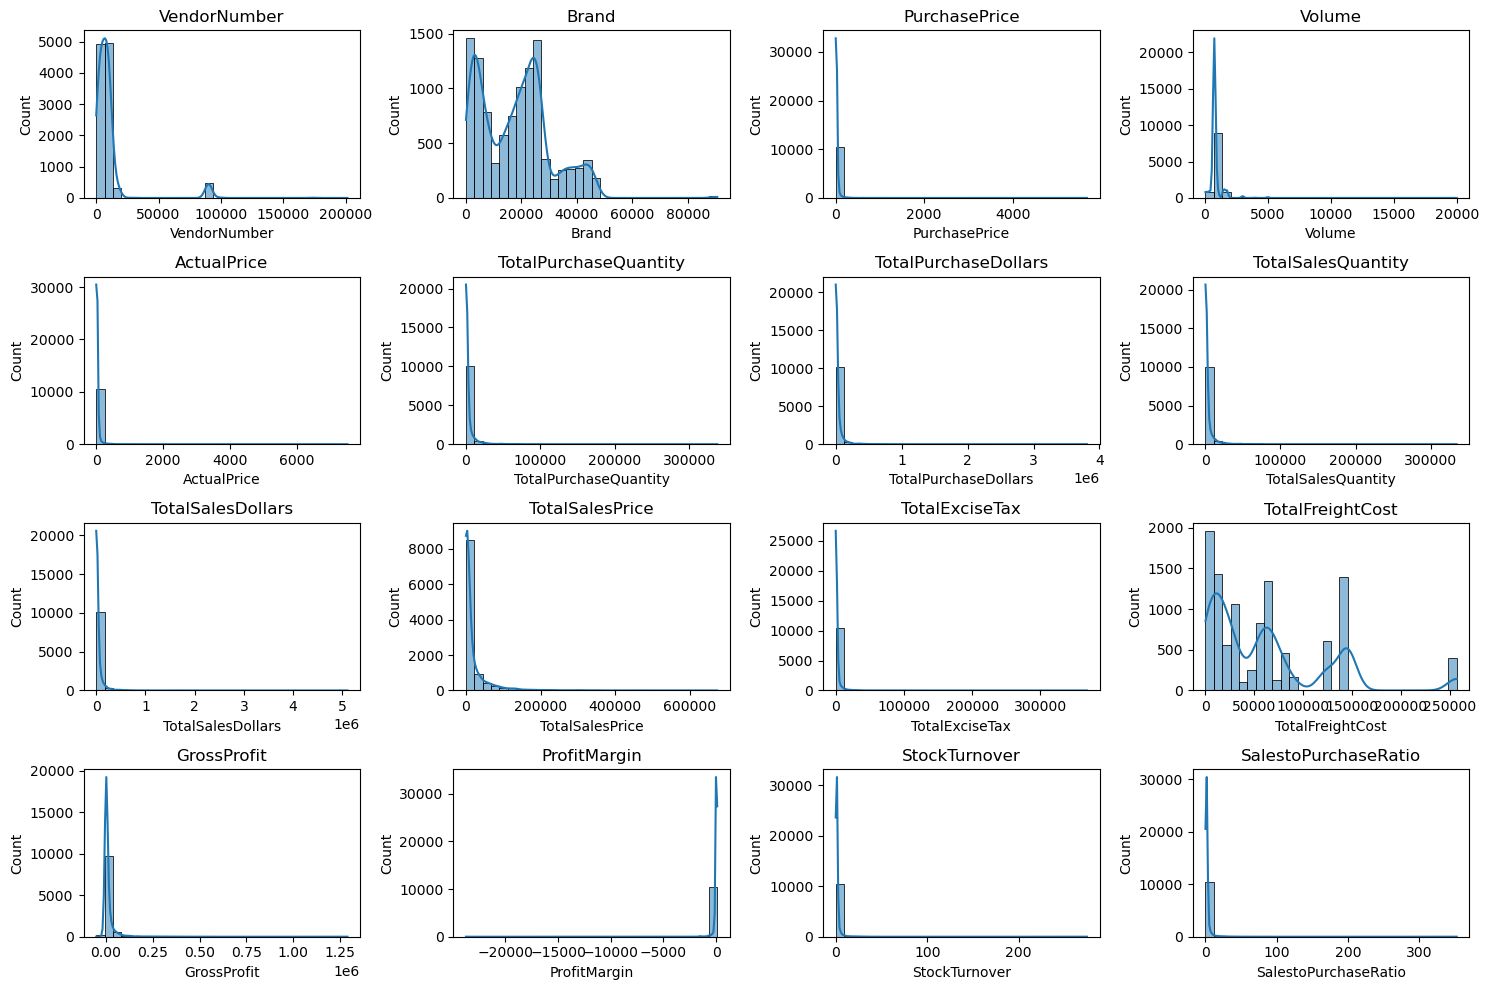

In [5]:
#Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

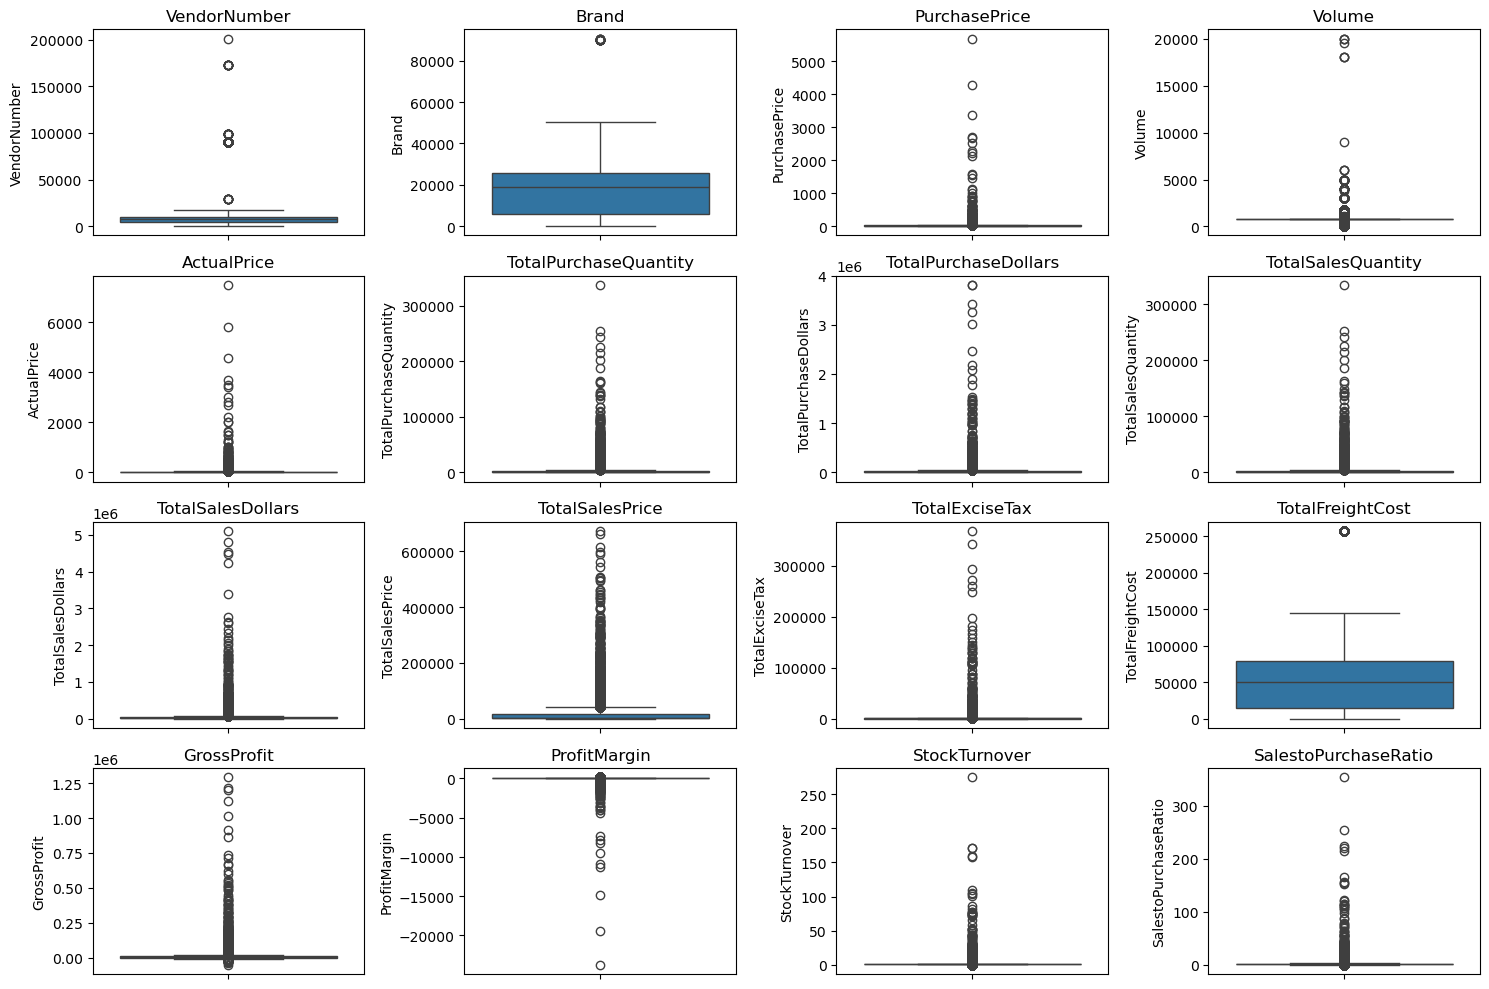

In [6]:
#Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [7]:
#lets filter the data by removing inconsistencies

df=pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0 """,conn)


In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,750.0,36.99,8.0,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,750.0,14.99,39.0,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,750.0,29.99,12.0,279.00,12.0,359.88,59.98,9.44,62.39,80.88,22.474158,1.000000,1.289892
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,750.0,49.99,320.0,11427.20,307.0,15346.93,12947.41,242.15,62.39,3919.73,25.540808,0.959375,1.343018
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,750.0,14.99,96.0,934.08,84.0,1511.16,287.84,9.43,6.19,577.08,38.187882,0.875000,1.617806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,172662,SWEETWATER FARM,2191,Clark & Chesterfield Whiskey,14.70,375.0,19.99,138.0,2028.60,125.0,2498.75,1819.09,49.00,178.34,470.15,18.815408,0.905797,1.231761
8560,172662,SWEETWATER FARM,2265,Monadnock Moonshine,21.47,750.0,28.99,267.0,5732.49,222.0,6435.78,5363.15,175.13,178.34,703.29,10.927813,0.831461,1.122685
8561,172662,SWEETWATER FARM,3632,Ashuelot Vodka,21.58,750.0,28.49,554.0,11955.32,452.0,12877.48,8205.12,356.14,178.34,922.16,7.161028,0.815884,1.077134
8562,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,750.0,24.99,1232.0,23863.84,982.0,24540.18,14469.21,773.87,202.50,676.34,2.756052,0.797078,1.028342


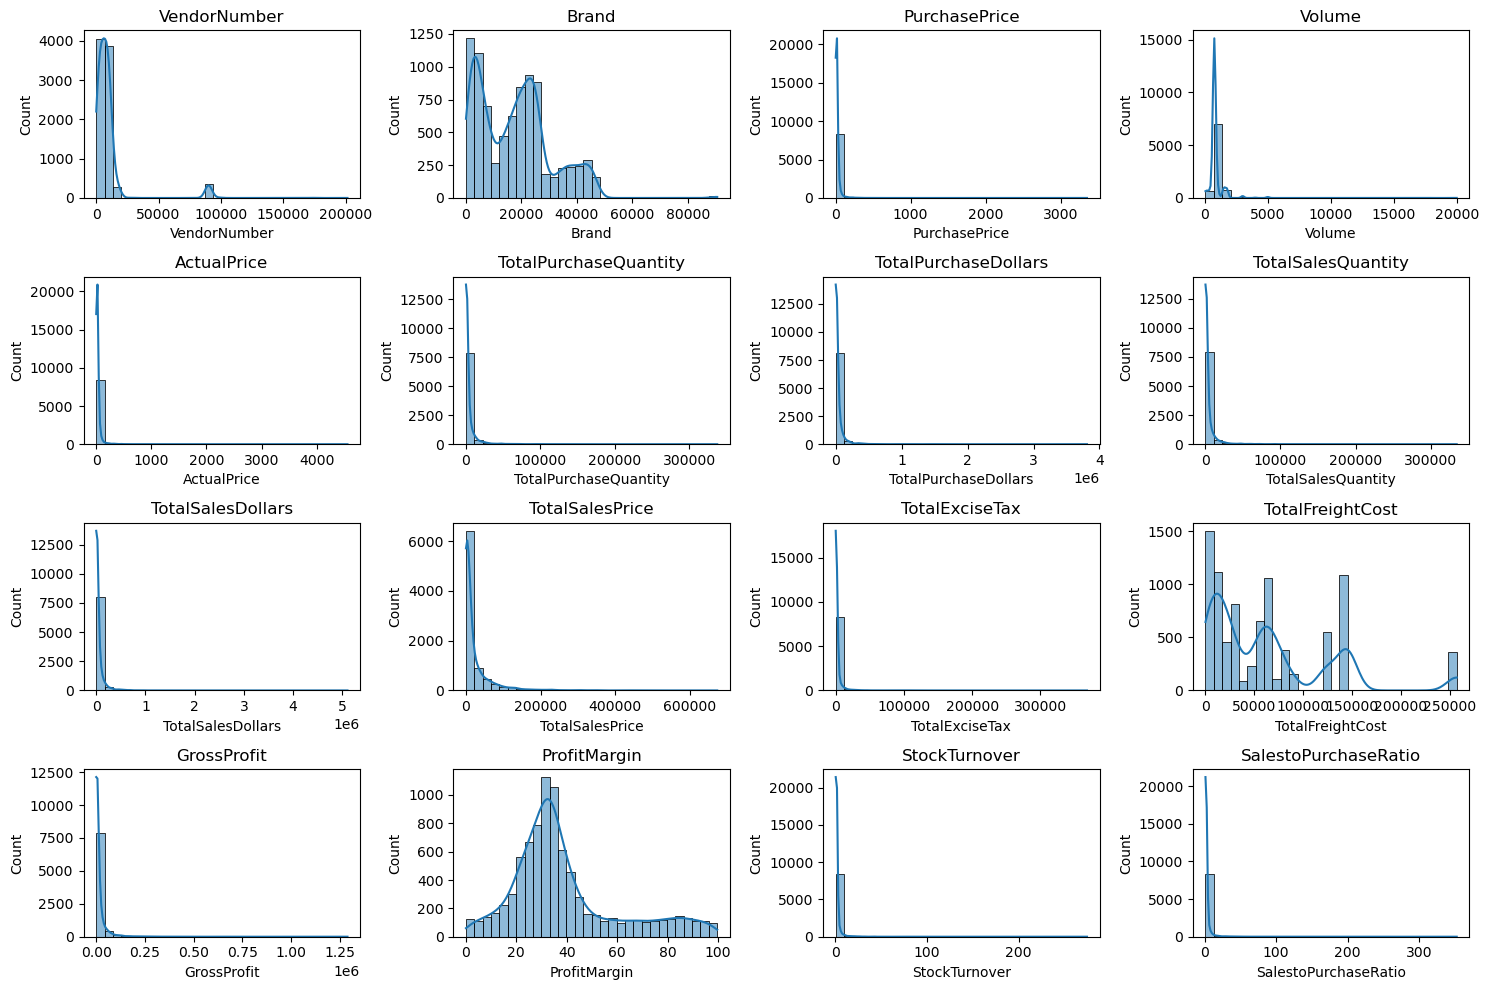

In [9]:
#Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,750.0,36.99,8.0,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,750.0,14.99,39.0,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,750.0,29.99,12.0,279.00,12.0,359.88,59.98,9.44,62.39,80.88,22.474158,1.000000,1.289892
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,750.0,49.99,320.0,11427.20,307.0,15346.93,12947.41,242.15,62.39,3919.73,25.540808,0.959375,1.343018
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,750.0,14.99,96.0,934.08,84.0,1511.16,287.84,9.43,6.19,577.08,38.187882,0.875000,1.617806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,172662,SWEETWATER FARM,2191,Clark & Chesterfield Whiskey,14.70,375.0,19.99,138.0,2028.60,125.0,2498.75,1819.09,49.00,178.34,470.15,18.815408,0.905797,1.231761
8560,172662,SWEETWATER FARM,2265,Monadnock Moonshine,21.47,750.0,28.99,267.0,5732.49,222.0,6435.78,5363.15,175.13,178.34,703.29,10.927813,0.831461,1.122685
8561,172662,SWEETWATER FARM,3632,Ashuelot Vodka,21.58,750.0,28.49,554.0,11955.32,452.0,12877.48,8205.12,356.14,178.34,922.16,7.161028,0.815884,1.077134
8562,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,750.0,24.99,1232.0,23863.84,982.0,24540.18,14469.21,773.87,202.50,676.34,2.756052,0.797078,1.028342


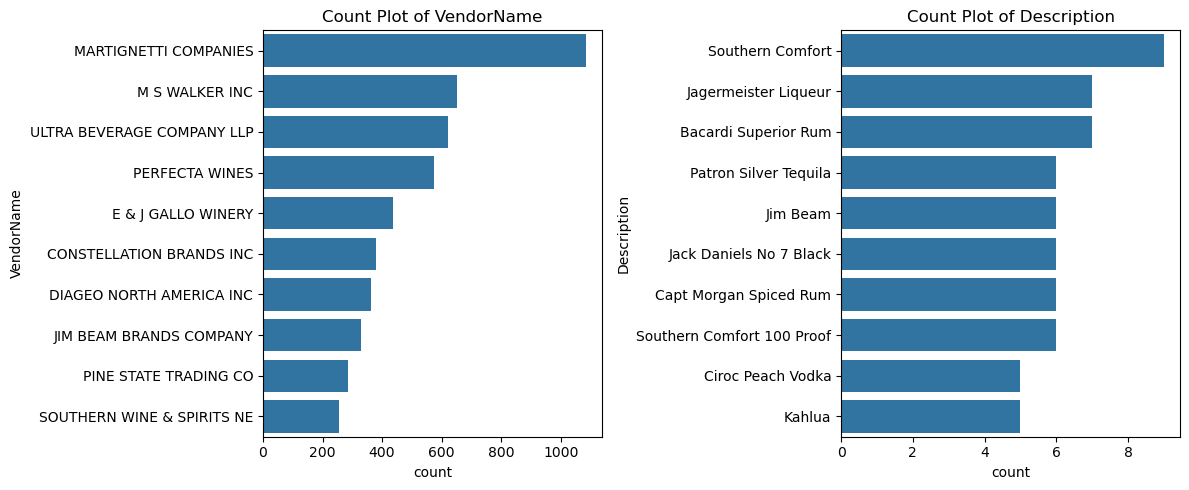

In [11]:
#count plots for categorical columns

categorical_cols = ["VendorName", "Description" ]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

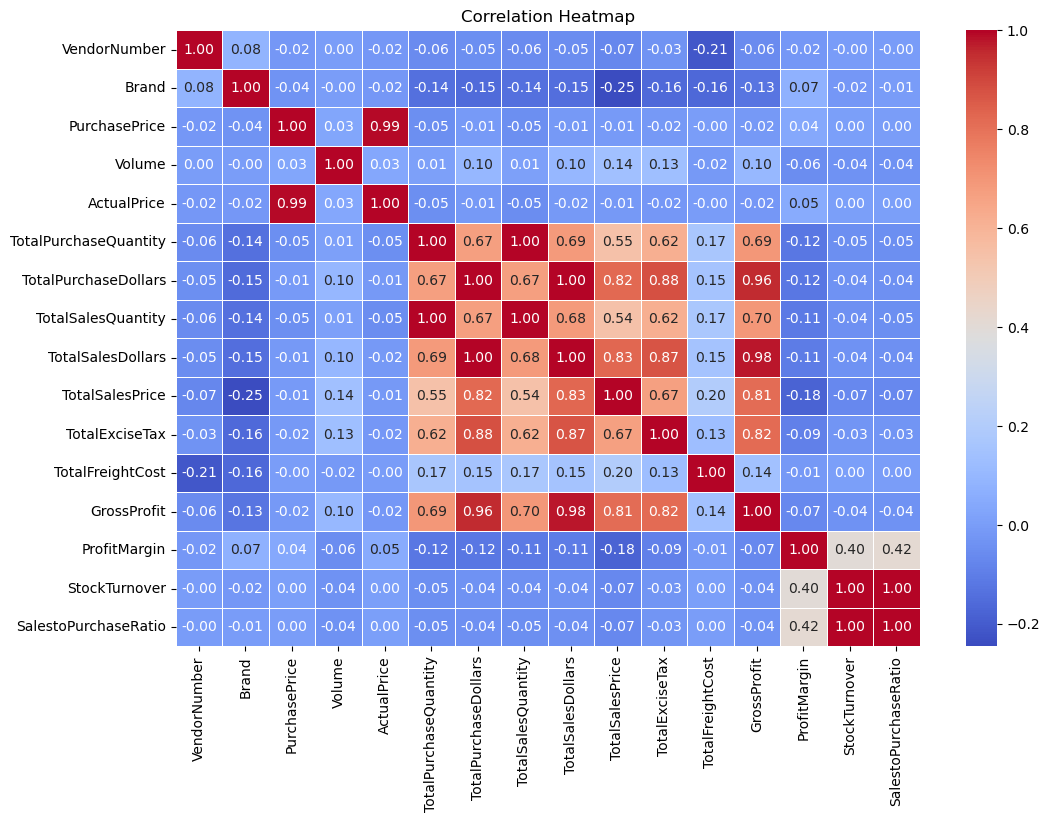

In [12]:
#Correlation Heatmap
plt.figure(figsize = (12,8))
correlation_matrix =df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold= brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552750113)

In [17]:
#filter brands with low sales but high profit margins

target_brands = brand_performance[

    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print("Brands with low sales but high Profit Margins : ")
display (target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high Profit Margins : 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


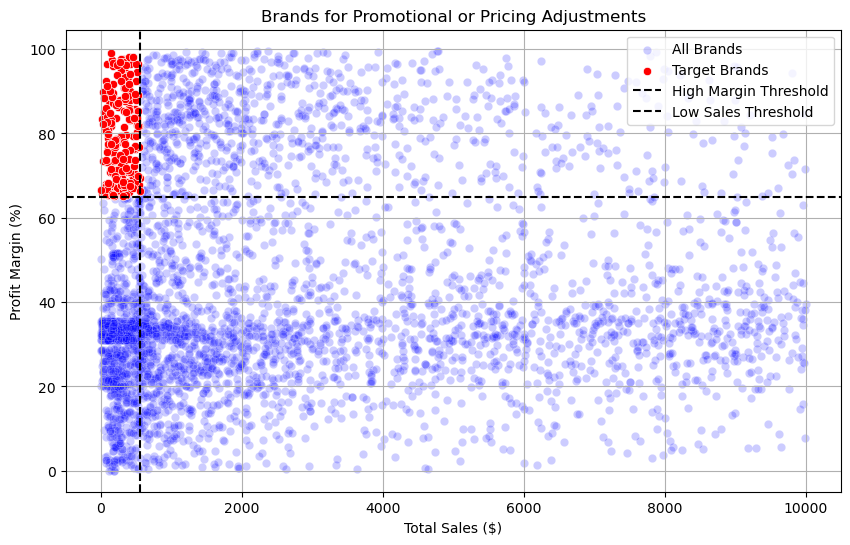

In [19]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<10000]

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="blue",
    label="All Brands",
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="red",
    label="Target Brands"
)

plt.axhline(
    high_margin_threshold,
    linestyle="--",
    color="black",
    label="High Margin Threshold"
)

plt.axvline(
    low_sales_threshold,
    linestyle="--",
    color="black",
    label="Low Sales Threshold"
)

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000 : .2f}M"

    elif value >= 1_000:
        return f"{value / 1_000 : .2f} K"

    else:
        return str(value)

In [20]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

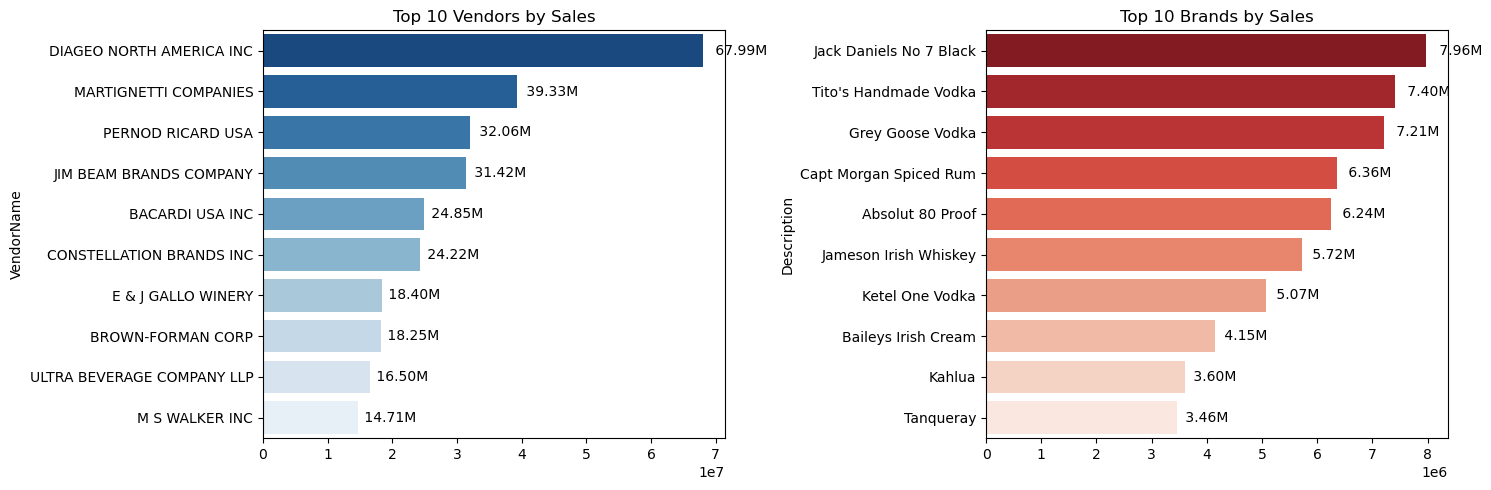

In [28]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"
)
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()



In [36]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()

In [51]:
vendor_performance['Purchase_Contribution%']=vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance=round(vendor_performance.sort_values('Purchase_Contribution%' , ascending= False),2)

In [52]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,3.18


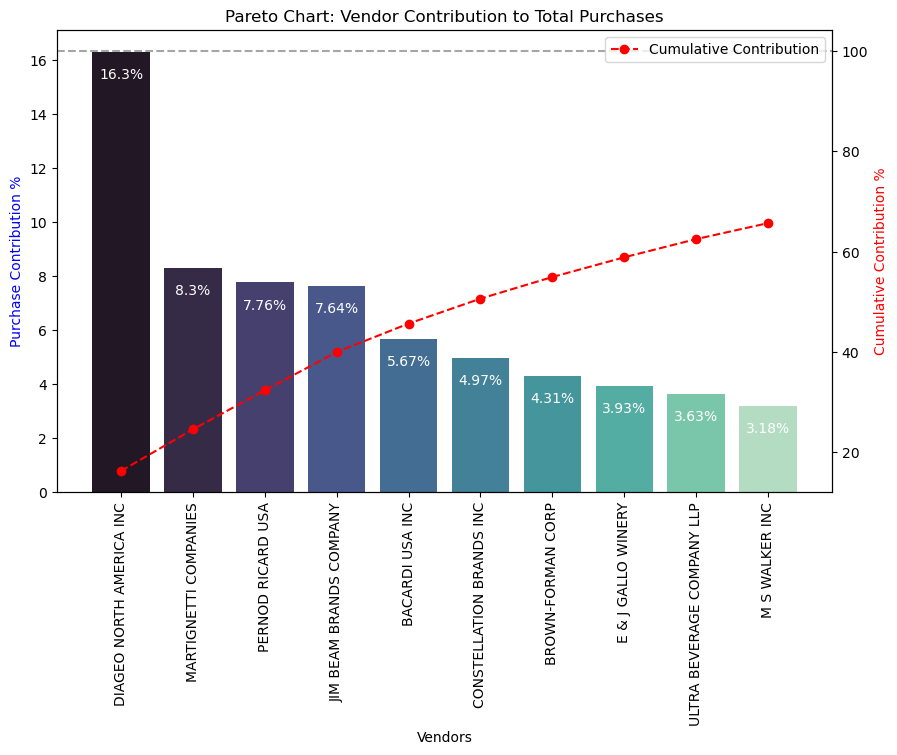

In [53]:
top_vendors['Cumulative_Contribution%']= top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contributions
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['Purchase_Contribution%'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(
        i,
        value - 1,
        str(value) + '%',
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cumulative Contributions
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


Total Purchase Contribution of top 10 vendors is 65.69 %


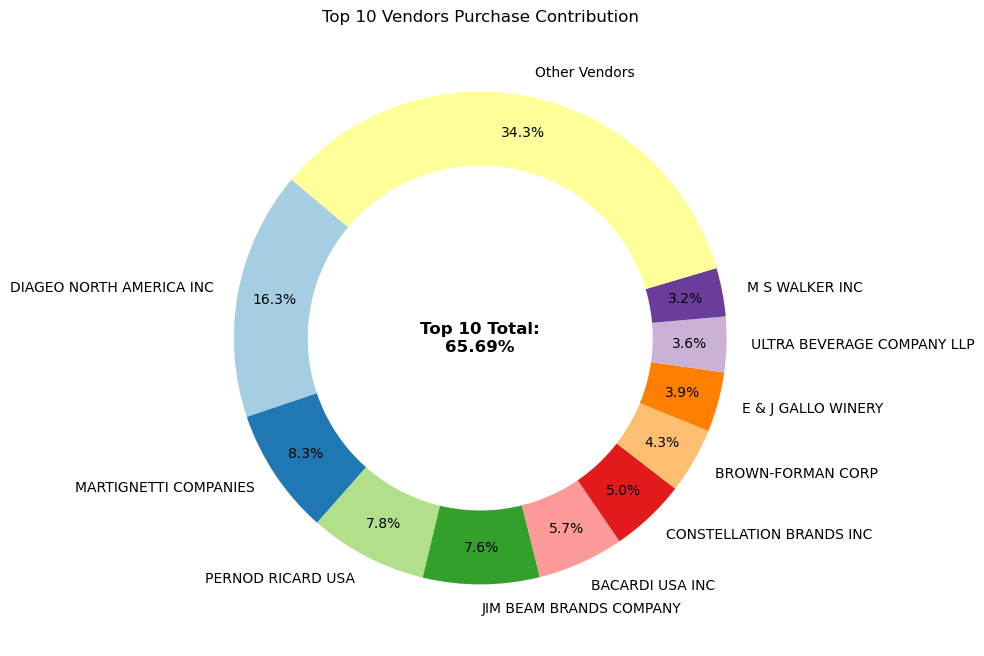

In [55]:
# Total Purchase Contribution of Top 10 Vendors
print(
    f"Total Purchase Contribution of top 10 vendors is "
    f"{round(top_vendors['Purchase_Contribution%'].sum(), 2)} %"
)

# Prepare data for Donut Chart
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=sns.color_palette("Paired")
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{round(total_contribution, 2)}%",
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=12,
    fontweight='bold'
)

plt.title("Top 10 Vendors Purchase Contribution")
plt.show()


In [57]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [60]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()


OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

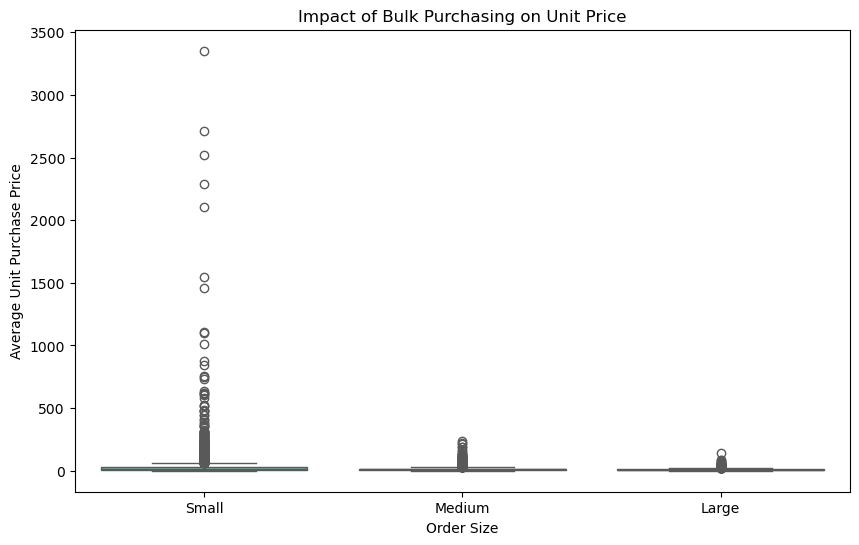

In [61]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='OrderSize',
    y='UnitPurchasePrice',
    palette='Set2'
)

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


In [69]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [70]:
# How much capital is locked in unsold inventory per vendor,
# and which vendors contribute the most to it?

df['UnsoldInventoryValue'] = (
    (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])
    * df['PurchasePrice']
)

print(
    "Total Unsold Capital:",
    format_dollars(df['UnsoldInventoryValue'].sum())
)


Total Unsold Capital:  2.71M


In [72]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = (
    df.groupby('VendorName')['UnsoldInventoryValue']
      .sum()
      .reset_index()
)

# Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by='UnsoldInventoryValue',
    ascending=False
)

inventory_value_per_vendor['UnsoldInventoryValue'] = (
    inventory_value_per_vendor['UnsoldInventoryValue']
    .apply(format_dollars)
)

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21 K
46,JIM BEAM BRANDS COMPANY,554.67 K
68,PERNOD RICARD USA,470.63 K
116,WILLIAM GRANT & SONS INC,401.96 K
30,E & J GALLO WINERY,228.28 K
79,SAZERAC CO INC,198.44 K
11,BROWN-FORMAN CORP,177.73 K
20,CONSTELLATION BRANDS INC,133.62 K
61,MOET HENNESSY USA INC,126.48 K
77,REMY COINTREAU USA INC,118.60 K


In [73]:
# What is the 95% confidence interval for profit margins
# of top-performing and low-performing vendors?

top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] > top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] < low_threshold]['ProfitMargin'].dropna()

top_vendors
low_vendors
# What is the 95% confidence interval for profit margins
# of top-performing and low-performing vendors?

top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] > top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] < low_threshold]['ProfitMargin'].dropna()

top_vendors
low_vendors


0       71.331591
1       36.672675
2       22.474158
9       20.559532
10      64.915236
          ...    
8549    41.388657
8550    21.862972
8551    73.338465
8553    40.470235
8556    88.098999
Name: ProfitMargin, Length: 2141, dtype: float64

In [74]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


In [76]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


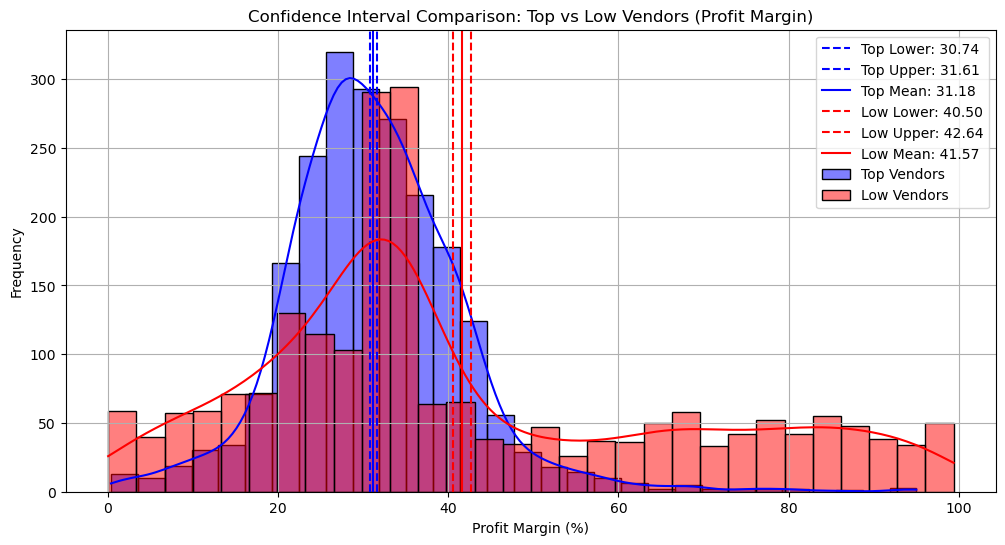

In [77]:
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [78]:
# H0 (Null Hypothesis):
# There is no significant difference in the mean profit margins
# of top-performing and low-performing vendors.

# H1 (Alternative Hypothesis):
# The mean profit margins of top-performing and low-performing vendors
# are significantly different.

top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] > top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] < low_threshold]['ProfitMargin'].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(
    top_vendors,
    low_vendors,
    equal_var=False
)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
